# **Trabajo Práctico N° 1 - Aprendizaje Automático II - 2024**

### **Redes Densas y Convolucionales**
**PROBLEMA 1**

---
**Alumnos:**


*   **Fontana Gustavo**
*   **Leguiza Claudia**



## **Librerías**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
import gdown

## **Carga del dataset**

**El dataset contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él.**

In [2]:
# Descargar el dataset
file_id = "1oNwPKSUsH5L2sXERqAp7xPdp0k9cuzGt"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, 'dataset.csv', quiet=True)

'dataset.csv'

In [3]:
# Cargar el dataset
data = pd.read_csv("/content/dataset.csv")

In [4]:
# Mapear a 0 y 1 la columna objetivo
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

## **Analisis exploratorio**

In [ ]:
# Visualización de las primeras filas del dataset
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**El dataset contiene 8 características relevantes con información:**

*  **Hours Studied**: El número total de horas dedicadas al estudio por cada estudiante.

* **Previous Scores**: Las puntuaciones obtenidas por los estudiantes en exámenes previos.

* **Extracurricular Activities**: Si el estudiante participa en actividades extracurriculares (Sí o No).

* **Sleep Hours**: El número promedio de horas de sueño que el estudiante tuvo por día.

* **Sample Question Papers Practiced**: El número de cuestionarios de muestra que el estudiante practicó.

* **Performance Index**: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

In [ ]:
# Observar información sobre el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


**El set de datos contiene variables numéricas.**

*   Las variables numéricas tienen tipo de datos int64 y float64.

*   Además, no hay presencia de valores faltantes en el conjunto de datos.

In [ ]:
# Principales medidas descrptivas de las variables
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


## **Visualización**

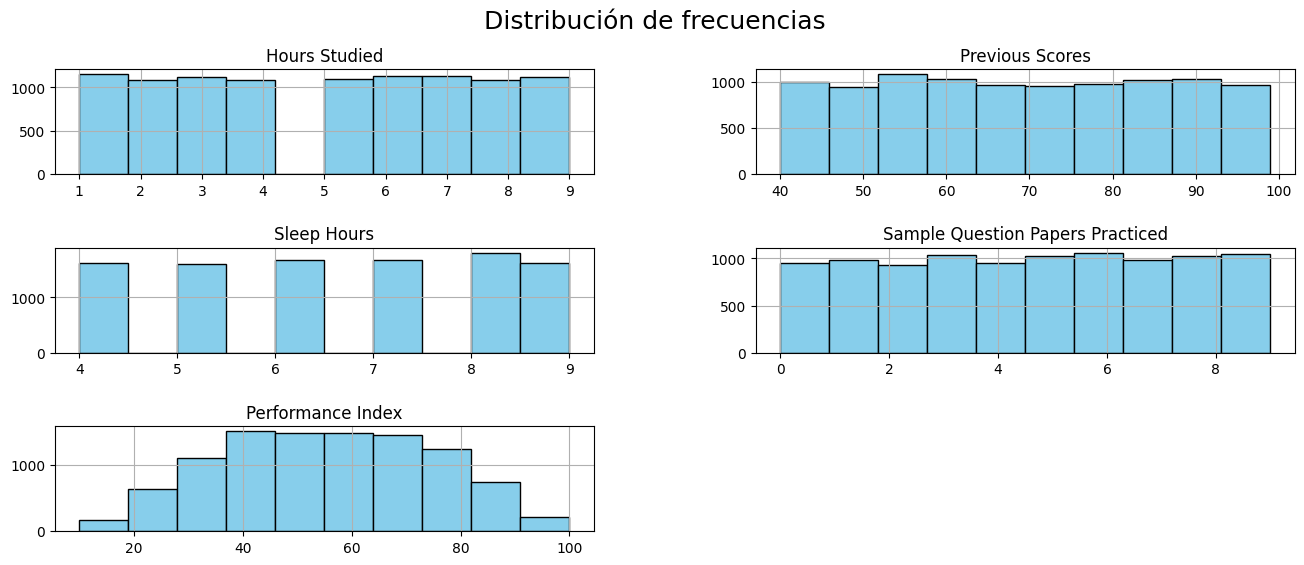

In [ ]:
# Graficos para observar la distribución
data.drop(axis=1,columns='Extracurricular Activities').hist(figsize=(16,6),facecolor='skyblue', edgecolor='black')
plt.subplots_adjust(hspace=0.7)
plt.suptitle('Distribución de frecuencias', fontsize=18)
plt.show()

### **Observaciones:**

En general, excepto Performance Index con una distribucón cercana a la normal con valores más frecuentes entre 40 y 80, todas las variables tienen una distribución relativamente uniforme.


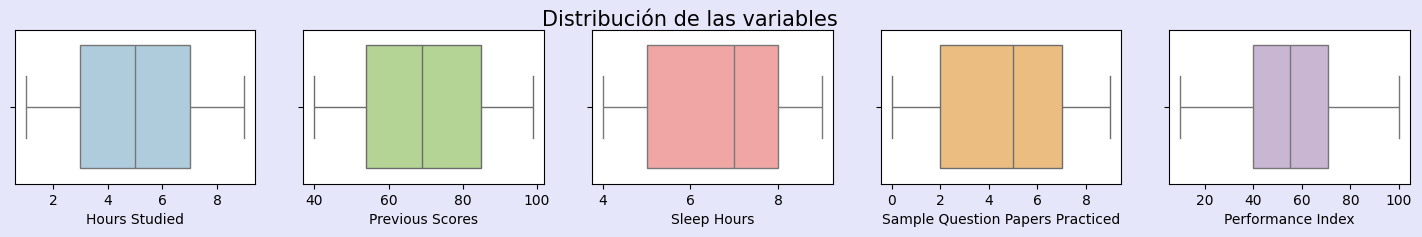

In [ ]:
# Graficos para observar la distribución
plt.figure(figsize=(18, 2), facecolor='lavender')

colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#6a3d9a']

for i, column in enumerate(data.drop('Extracurricular Activities', axis=1)):
    plt.subplot(151 + i)
    sns.boxplot(x=data[column], orient='h', color=colors[i])

plt.suptitle('Distribución de las variables', fontsize=15)
plt.show()

### **Observaciones:**

- **Hours Studied:** La mediana parece estar alrededor de 5 horas, con un rango intercuartil entre aproximadamente 4 y 6 horas.

-  **Previous Scores:** La mediana se encuentra alrededor de 70, y los datos se distribuyen entre 60 y 80.

-  **Sleep Hours:** La mediana está alrededor de 7 horas, y la mayoría de los datos se encuentran entre 6 y 8 horas.

-  **Sample Question Papers Practiced:** La mediana está en 5, con datos principalmente entre 4 y 6.

-  **Performance Index:** La mediana se encuentra cerca de 60, y el rango principal va de 40 a 80.

No se observan valores atípicos en ninguna de las variables.

## **Análisis multivaraible**

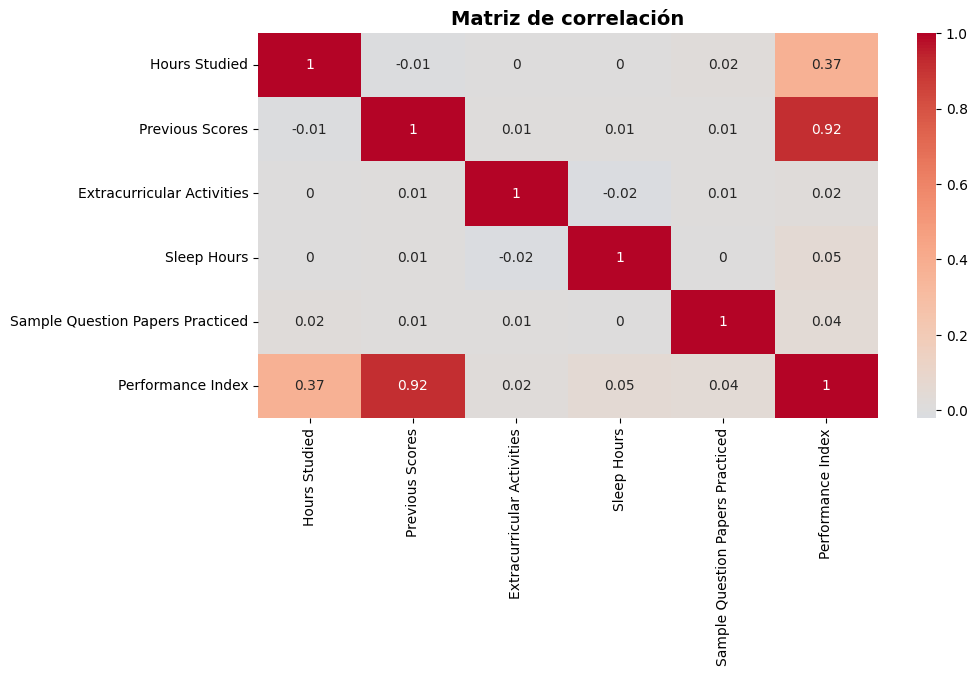

In [ ]:
# Correlación entre variables
corr = data.corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title('Matriz de correlación',fontweight='bold',fontsize=14)
plt.show()

### **Interpretación:**

La correlación entre variables observadas es casi nula, salvo por Performance Index y Previous Scores que tienen una correlacion positiva bastante alta.

## **Modelos**

### **Split del dataset**

In [7]:
# Primer split: dividir en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(data.drop('Performance Index', axis=1),
                                                    data['Performance Index'],
                                                    test_size=0.15,
                                                    random_state=42)

# Segundo split: dividir el set de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.1765,
                                                  random_state=42)

### **Escalado de características**

In [8]:
# Escalar la características
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train.select_dtypes(include='int64'))
x_val_std = scaler.transform(x_val.select_dtypes(include='int64'))
x_test_std = scaler.transform(x_test.select_dtypes(include='int64'))

### **Función para evaluar el desempeño**

In [53]:
# Función para observar las métricas del modelo
def metrics(y_test, y_pred):
  """
  Función para obtener métricas, tales como MSE y MAE.
  """
  # ERROR CUADRÁTICO MEDIO
  mse = round(mean_squared_error(y_test, y_pred),1)
  # ERROR ABSOLUTO MEDIO
  mae = round(mean_absolute_error(y_test, y_pred),1)

  return mse, mae

### **Redes Neuronales Densas**

In [37]:
# Construir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [36]:
# Definir métrica para evaluar el rendimiento
def r2_score(y_true, y_pred):
    """Calcula el coeficiente de determinación R²."""
    ss_total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    ss_residual = tf.reduce_sum(tf.square(y_true - y_pred))
    return 1 - ss_residual / (ss_total + tf.keras.backend.epsilon())

In [11]:
# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compilar
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mean_squared_error',
              metrics=[r2_score])

# Entrenar el modelo
history = model.fit(
    x = x_train_std,
    y= y_train,
    validation_data=(x_val_std, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3298.4180 - r2_score: -8.7286 - val_loss: 2749.7224 - val_r2_score: -7.1211
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2356.0771 - r2_score: -5.6313 - val_loss: 1231.1885 - val_r2_score: -2.6565
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 883.9709 - r2_score: -1.5488 - val_loss: 233.8481 - val_r2_score: 0.2923
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 150.5349 - r2_score: 0.5615 - val_loss: 46.2275 - val_r2_score: 0.8591
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.6911 - r2_score: 0.8880 - val_loss: 29.4205 - val_r2_score: 0.9127
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.9235 - r2_score: 0.9233 - val_loss: 25.7334 - val_r2_score: 0.9245
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.9215 - r2_score: 0.9328 - val_loss: 23.3093 - val_r2_score: 0.9319
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.9491 - r2_

In [22]:
# Dataframe con comparación de métricas
metrics_df = pd.DataFrame(index=['MSE','MAE'],
                               columns=['Train', 'Test'])

test_mse, test_mae = metrics(y_test, model.predict(x_test_std))
train_mse, train_mae = metrics(y_train, model.predict(x_train_std))

metrics_df['Train'] = [train_mse, train_mae]
metrics_df['Test'] = [test_mse, test_mae]

# Obtener métricas
metrics_df

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,Train,Test
MSE,4.3,4.4
MAE,1.6,1.7


### **Interpretación:**

*  **Ajuste del modelo**: Las métricas de error son bajas en ambos conjuntos, lo que indica que el modelo está bien entrenado para predecir el índice de rendimiento académico.

*  **Generalización**: La pequeña diferencia entre las métricas de entrenamiento y prueba sugiere que el modelo no está sobreajustado ni subajustado.

*  **Interpretación del error**: Un MAE de ~1.7 significa que el modelo, en promedio, comete errores de predicción en ±1.7 puntos en el índice de rendimiento.

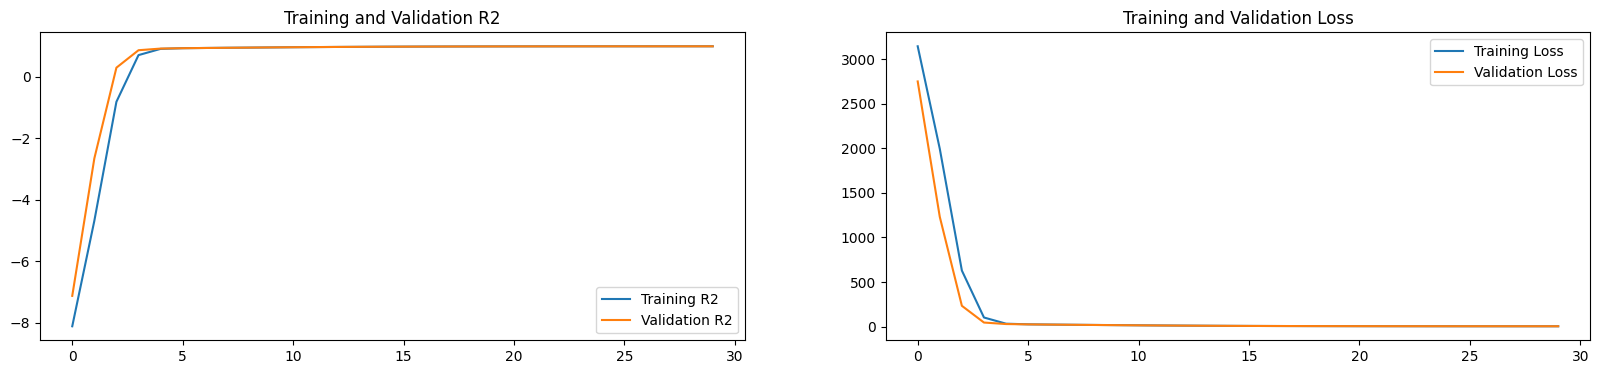

In [23]:
# Comparar la evolución del r2 y el loss de train y val
train_r2_score = history.history['r2_score']
val_r2_score = history.history['val_r2_score']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_r2_score, label='Training R2')
plt.plot(epochs_range, val_r2_score, label='Validation R2')
plt.legend(loc='lower right')
plt.title('Training and Validation R2')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Modelo con solo dos variables**

**Se prueba el modelo con solo dos variables, para obsrvar que tan bien predice con menos información.**

In [42]:
# Variables Previous Score, Hours Studied
x_train_sel = x_train[['Previous Scores', 'Hours Studied']]
x_val_sel = x_val[['Previous Scores', 'Hours Studied']]
x_test_sel = x_test[['Previous Scores', 'Hours Studied']]

# Estandarizar
xx_train_std = scaler.fit_transform(x_train_sel)
xx_val_std = scaler.transform(x_val_sel)
xx_test_std = scaler.transform(x_test_sel)

In [27]:
# Crear el dataframe con solo dos variables
X1 = data['Previous Scores'].to_numpy()
X2 = data['Hours Studied'].to_numpy()
Y = data['Performance Index'].to_numpy()

x = np.column_stack([X1, X2])
y = Y

In [32]:
# Construir el modelo
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [39]:
# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compilar
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss='mean_squared_error',
                metrics=[r2_score])

# Entrenar el modelo
history_2 = model_2.fit(
    x=xx_train_std,
    y=y_train,
    validation_data=(xx_val_std, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3286.2273 - r2_score: -8.3177 - val_loss: 2723.0730 - val_r2_score: -7.0400
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2365.8875 - r2_score: -5.8699 - val_loss: 1268.8654 - val_r2_score: -2.7667
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 958.5320 - r2_score: -1.7573 - val_loss: 315.1680 - val_r2_score: 0.0494
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 224.8510 - r2_score: 0.3289 - val_loss: 70.5749 - val_r2_score: 0.7842
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.1360 - r2_score: 0.8285 - val_loss: 31.2739 - val_r2_score: 0.9062
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.2179 - r2_score: 0.9162 - val_loss: 24.0562 - val_r2_score: 0.9294
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0844 - r2_score: 0.9346 - val_loss: 20.1006 - val_r2_score: 0.9415
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.0027 - r2_s

In [55]:
# Dataframe con comparación de métricas
metrics_df = pd.DataFrame(index=['MSE','MAE'],
                               columns=['Train', 'Test'])

test_mse, test_mae = metrics(y_test, model_2.predict(xx_test_std))
train_mse, train_mae = metrics(y_train, model_2.predict(xx_train_std))

metrics_df['Train'] = [train_mse, train_mae]
metrics_df['Test'] = [test_mse, test_mae]

# Obtener métricas
metrics_df

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Train,Test
MSE,5.2,5.5
MAE,1.8,1.9


### **Interpretación:**

El modelo con solo dos variables aún tiene un rendimiento aceptable, pero pierde algo de precisión al no considerar otras características. Esto sugiere que las variables eliminadas tienen un impacto en la capacidad del modelo para capturar patrones importantes.

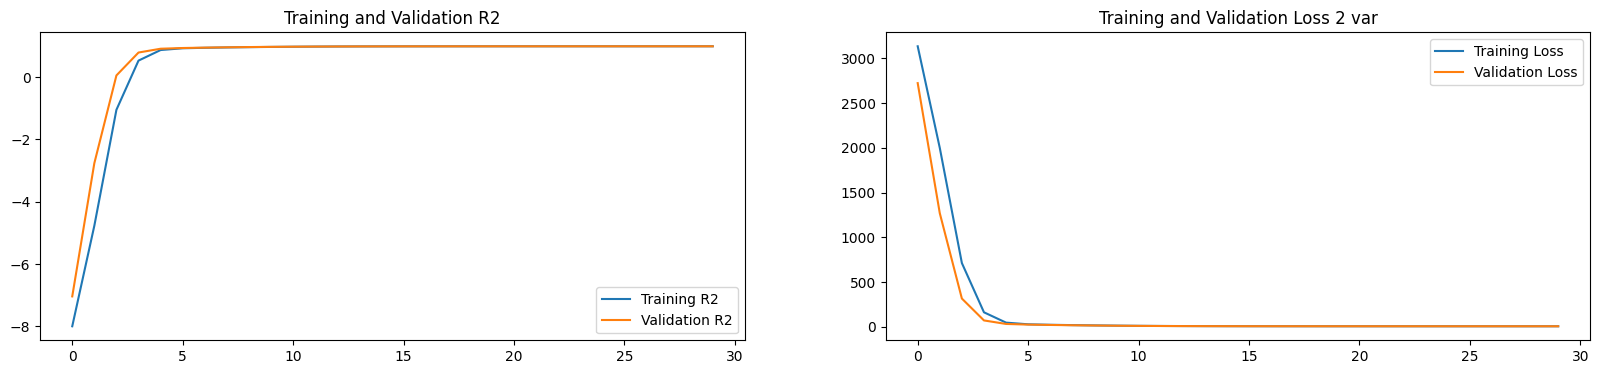

In [40]:
# Comparar la evolución del r2 y el loss de train y val
train_r2_score = history_2.history['r2_score']
val_r2_score = history_2.history['val_r2_score']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_r2_score, label='Training R2')
plt.plot(epochs_range, val_r2_score, label='Validation R2')
plt.legend(loc='lower right')
plt.title('Training and Validation R2')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss 2 var')
plt.show()

## **Conclusión final**

**Se construyó un modelo simple para predecir la nota final de un estudiante en función de varias características, y un segundo modelo basado únicamente en dos de ellas. Para ambos modelos, se escalaron las variables para evitar que alguna tuviera un peso excesivo, y se visualizó la evolución del R2, la métrica observada, a lo largo del entrenamiento.**

**Tanto el modelo con todas las características como el modelo con solo dos variables alcanzaron un desempeño muy alto, con resultados cercanos al 98% de eficiencia. Esto sugiere una relación significativa entre las notas previas y las horas dedicadas al estudio con el rendimiento final, una correlación que podría no ser tan evidente al observar solo la matriz de correlación.**